## Assignment 1: Introduction to Data Science and Python - By Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>?</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>?</font> |

### Step 0: Import Library

In [286]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_rows', 100)

### Step 1: Select and Load datasets

In [287]:
# load related datasets, in this assignment, we choose 3 datasets
gdp_per_captita = pd.read_csv('gdp-per-capita-maddison-2020.csv')
life_expectancy = pd.read_csv('life-expectancy.csv')
gdp = pd.read_csv('gross-domestic-product.csv')

### Step2: Merge datasets

In [288]:
# merge three datasets into one dataset
df = pd.merge(gdp_per_captita,life_expectancy)
# df = pd.merge(df1,gdp)
df

,Entity,Code,Year,GDP per capita,417485-annotations,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,1156.0000,NaN,27.7
1,Afghanistan,AFG,1951,1170.0000,NaN,28.0
2,Afghanistan,AFG,1952,1189.0000,NaN,28.4
3,Afghanistan,AFG,1953,1240.0000,NaN,28.9
4,Afghanistan,AFG,1954,1245.0000,NaN,29.2
...,...,...,...,...,...,...
12440,Zimbabwe,ZWE,2014,1594.0000,NaN,58.8
12441,Zimbabwe,ZWE,2015,1560.0000,NaN,59.6
12442,Zimbabwe,ZWE,2016,1534.0000,NaN,60.3
12443,Zimbabwe,ZWE,2017,1582.3662,NaN,60.7


### Step 3: Clean data

Clear data of gdp_per_captita

In [289]:
# print(df['Code'].unique())

# drop unnecessary column '417485-annotations' 
df = df.drop('417485-annotations', axis=1)

# drop Entities which are not a country
df = df[df['Code']!='OWID_WRL']

# check if there is missing values in gdp_per_captita
print(df.isnull().sum())

# drop 'nan' values
df = df[df['Code'].notnull()]

print(df['Code'].unique())
print(df.isnull().sum())
df.head()


Entity                                   0
Code                                     0
Year                                     0
GDP per capita                           0
Life expectancy at birth (historical)    0
dtype: int64
['AFG' 'ALB' 'DZA' 'AGO' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD' 'BRB'
 'BLR' 'BEL' 'BEN' 'BOL' 'BIH' 'BWA' 'BRA' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV'
 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ'
 'EST' 'SWZ' 'ETH' 'FIN' 'FRA' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GTM'
 'GIN' 'GNB' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL'
 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MLI' 'MLT' 'MRT' 'MUS'
 'MEX' 'MDA' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL' 'NIC'
 'NER' 'NGA' 'PRK' 'MKD' 'NOR' 'OMN' 'PAK' 'PSE' 'PAN' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA'

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,1156.0,27.7
1,Afghanistan,AFG,1951,1170.0,28.0
2,Afghanistan,AFG,1952,1189.0,28.4
3,Afghanistan,AFG,1953,1240.0,28.9
4,Afghanistan,AFG,1954,1245.0,29.2


In [290]:
df.describe()

,Year,GDP per capita,Life expectancy at birth (historical)
count,12431.000000,12431.000000,12431.000000
mean,1973.152844,9207.957746,60.299574
std,41.703765,11926.772482,13.204654
min,1543.000000,377.580100,12.000000
25%,1960.000000,1970.732150,49.500000
50%,1981.000000,4812.000000,62.300000
75%,2000.000000,11171.104500,71.300000
max,2018.000000,156299.000000,85.200000


### Step4: Plot 

Select 4 years, 2018,1990,1950,1900

<AxesSubplot: xlabel='GDP per capita', ylabel='Life expectancy at birth (historical)'>

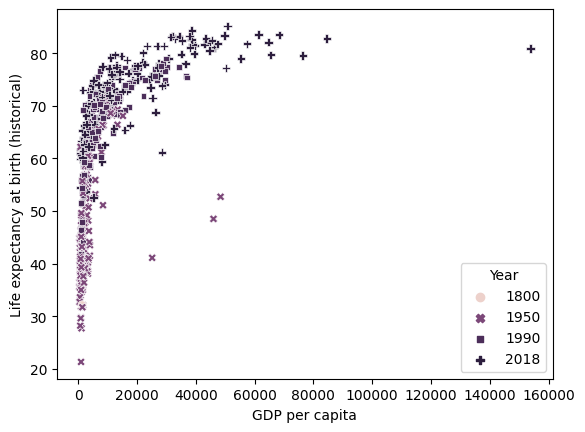

In [291]:
df = df[(df['Year']==1800) | (df['Year']==1950) | (df['Year']==1990) | (df['Year']==2018)]

sns.scatterplot(data=df, x="GDP per capita", y="Life expectancy at birth (historical)", hue="Year",style="Year")

In [197]:
# @widgets.interact(year=(1950,2018,10),continuous_update=False)

# def f(year):


# fig = plt.figure(figsize=[15,10])
# plt.axhline(y=1/K,linewidth=4, color='r')
# plt.plot(np.transpose(p_n_iteration),'b--')
# plt.xlabel('state $K$')
# plt.ylabel('probability')
# plt.title('state probability vector')
# plt.legend(['stationary probability vector','$\mathbf{p_i}(n_iteration)$'])
# plt.show()